# Model Creation Station

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
import random

DATASET_DIR = 'training'
DATA_KEY_PATH = 'training/data_key.csv'
LABELS_PATH = 'mouth_shape_categories.txt'
IMG_SIZE = (100,100)
DATASET_NP_FILE = 'training/dataset.npz'

MODEL_FILE = 'model/default.h5'
TEST_DIR = 'training/selected'

## Setup Dataset from CSV

You can skip to "Load Dataset from NPZ file" if you've already run this once

In [2]:
# def create_image_dataset(df):
#     dataset = []
#     for file in df.index.values:
# #         img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
# #         img = cv2.resize(img, (2*IMG_SIZE[0], IMG_SIZE[1]))
        
#         expected = df.loc[file].to_numpy()
#         expected_mirror = np.append(expected[:-1], [1.0 - expected[-1]])
        
# #         dataset.append([img[:,:IMG_SIZE[0]], expected])
# #         dataset.append([img[:,IMG_SIZE[0]:], expected_mirror])
#         im1, im2 = process_single_img(file)

#         dataset.append([im1, expected])
#         dataset.append([im2, expected_mirror])
#     return dataset

def create_image_dataset_generator(df):
    count = 1
    
    files = df.index.values.copy()
    random.shuffle(files)
    for file in files:
        print(f'{count}', end='\r')
        expected_right = df.loc[file].to_numpy()
        expected_left = np.append(expected_right[:-1], [1.0 - expected_right[-1]])

        im1, im2 = process_single_img(file)

#         print(im1.shape, im2.shape)
        
        yield [im1, expected_left]
        yield [im2, expected_right]
        count += 1

def process_single_img(file):
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (2*IMG_SIZE[0], IMG_SIZE[1]))
    
    return (img[:,:IMG_SIZE[0]], img[:,IMG_SIZE[0]:][:,::-1])

In [3]:
df = pd.read_csv(DATA_KEY_PATH, index_col=0)
df = df.set_index("filename")
# df = df.loc[(df != 0).any(axis=1)]
df

,AEI,L,O,CDGKNSTXYZ,FV,QW,BMP,U,E,R,TH,CH J SH,Smile,Frown,Tongue Out,Bottom Lip Horizontal Offset
filename,,,,,,,,,,,,,,,,
training/no yawn/2760.jpg,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.612500,0.0,0.0,0.5000
training/no yawn/2761.jpg,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.184375,0.0,0.0,0.5000
training/no yawn/2762.jpg,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.746875,0.0,0.0,0.5000
training/no yawn/2763.jpg,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.096875,0.0,0.0,0.5000
training/no yawn/2764.jpg,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.4375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
training/BottomL_ChJSh/01436.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0000
training/BottomL_ChJSh/01440.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0000
training/BottomL_ChJSh/01444.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0000


In [4]:
training_generator = create_image_dataset_generator(df)
# training_data = [next(training_generator) for _ in range(1000)]
training_data = [*training_generator]

In [5]:
# random.shuffle(training_data)

In [6]:
X = []
y = []

for features, expected in training_data:
    X.append(features)
    y.append(expected)

X = np.array(X).reshape(-1, *IMG_SIZE, 1)

In [7]:
np.savez(DATASET_NP_FILE, X=X, y=y)

## Load Dataset from NPZ file

In [8]:
X, y = np.load(DATASET_NP_FILE).values()

In [9]:
print(len(X))
print(len(y))
[*map(print, y[:10])]

72490
72490
[0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.5]
[0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.5]
[0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5]
[0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.5]
[0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.5]
[1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.5]
[1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.5]


[None, None, None, None, None, None, None, None, None, None]

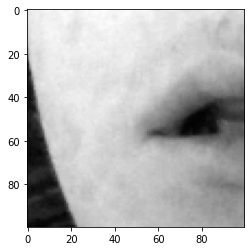

[0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5]


In [10]:
index = random.randint(0,len(X))

img = X[index].reshape(*IMG_SIZE[::-1])
plt.imshow(img, cmap="gray")
plt.show()

print(y[index])

## Setup Model

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

2022-03-31 20:23:28.758744: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [12]:
model = Sequential([
    Rescaling(1./255, input_shape=X.shape[1:]),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(y[0]), activation='sigmoid'),
#     Activation('sigmoid')
])

2022-03-31 07:25:08.402477: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-31 07:25:08.403125: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-03-31 07:25:08.426688: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-31 07:25:08.426827: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: NVIDIA GeForce GTX 1060 3GB computeCapability: 6.1
coreClock: 1.7085GHz coreCount: 9 deviceMemorySize: 2.95GiB deviceMemoryBandwidth: 178.99GiB/s
2022-03-31 07:25:08.426844: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-03-31 07:25:08.428227: I tensorflow/stream_executor/platfor

In [13]:
model.compile(optimizer='adam',
             loss='mse',
             metrics=['accuracy'])

history = model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)

2022-03-31 07:25:11.464445: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 652410000 exceeds 10% of free system memory.
2022-03-31 07:25:11.735706: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-31 07:25:11.736003: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3599990000 Hz


Epoch 1/10


2022-03-31 07:25:12.008527: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-03-31 07:25:12.130357: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7


2039/2039 [==============================] - ETA: 0s - loss: 0.0641 - accuracy: 0.1957

2022-03-31 07:25:31.603338: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 72490000 exceeds 10% of free system memory.


2039/2039 [==============================] - 21s 10ms/step - loss: 0.0641 - accuracy: 0.1958 - val_loss: 0.0313 - val_accuracy: 0.4947
Epoch 2/10
2039/2039 [==============================] - 19s 9ms/step - loss: 0.0254 - accuracy: 0.5414 - val_loss: 0.0180 - val_accuracy: 0.5896
Epoch 3/10
2039/2039 [==============================] - 19s 9ms/step - loss: 0.0157 - accuracy: 0.6131 - val_loss: 0.0141 - val_accuracy: 0.6295
Epoch 4/10
2039/2039 [==============================] - 19s 9ms/step - loss: 0.0118 - accuracy: 0.6393 - val_loss: 0.0115 - val_accuracy: 0.6616
Epoch 5/10
2039/2039 [==============================] - 19s 9ms/step - loss: 0.0094 - accuracy: 0.6600 - val_loss: 0.0103 - val_accuracy: 0.6783
Epoch 6/10
2039/2039 [==============================] - 19s 9ms/step - loss: 0.0078 - accuracy: 0.6711 - val_loss: 0.0095 - val_accuracy: 0.6611
Epoch 7/10
2039/2039 [==============================] - 19s 9ms/step - loss: 0.0066 - accuracy: 0.6806 - val_loss: 0.0081 - val_accuracy: 0.

In [14]:
model.save(MODEL_FILE)

2022-03-31 07:42:44.713728: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model/default/assets


## Load Model from File

In [5]:
loaded_model = tf.keras.models.load_model(MODEL_FILE)
loaded_model.summary()

2022-03-31 20:23:35.738041: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-31 20:23:35.738787: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-03-31 20:23:35.777078: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-31 20:23:35.777235: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: NVIDIA GeForce GTX 1060 3GB computeCapability: 6.1
coreClock: 1.7085GHz coreCount: 9 deviceMemorySize: 2.95GiB deviceMemoryBandwidth: 178.99GiB/s
2022-03-31 20:23:35.777251: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-03-31 20:23:35.778341: I tensorflow/stream_executor/platfor

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 100, 100, 1)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 100, 100, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0

## Test Model

In [16]:
import os
import random

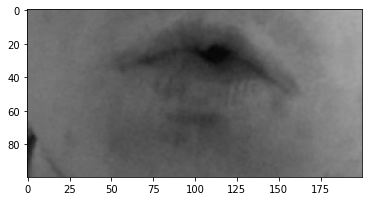

In [21]:
test_files = [os.path.join(path, name) for path, subdirs, files in os.walk(TEST_DIR) for name in files]
test_file = random.choice(test_files)

img = cv2.imread(test_file)
plt.imshow(img, cmap="gray")
plt.show()

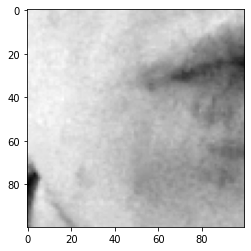

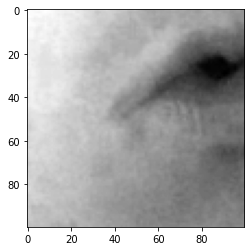

In [22]:
im1, im2 = process_single_img(test_file)
plt.imshow(im1, cmap="gray")
plt.show()
plt.imshow(im2, cmap="gray")
plt.show()

In [23]:
im1 = np.array([im1]).reshape(-1, *IMG_SIZE, 1)
pred1 = loaded_model.predict(im1)
[round(x, 2) for x in pred1.flatten().tolist()]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.98,
 0.0,
 0.47]

In [24]:
im2 = np.array([im2]).reshape(-1, *IMG_SIZE, 1)
pred2 = loaded_model.predict(im2)
[round(x, 2) for x in pred2.flatten().tolist()]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.48]

## Sources

1. [https://www.w3resource.com/python-exercises/numpy/basic/numpy-basic-exercise-36.php](https://www.w3resource.com/python-exercises/numpy/basic/numpy-basic-exercise-36.php)
2. [https://stackoverflow.com/questions/21164910/how-do-i-delete-a-column-that-contains-only-zeros-in-pandas](https://stackoverflow.com/questions/21164910/how-do-i-delete-a-column-that-contains-only-zeros-in-pandas)

